In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/data/insurance.csv")

In [3]:
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5, 1.0, 'Histogram of charges')

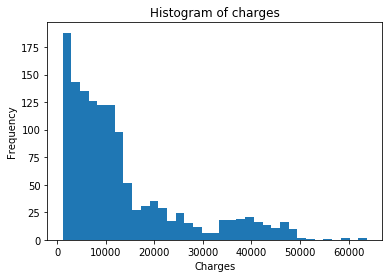

In [10]:
df.charges.plot.hist(bins = 35)
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Histogram of charges")

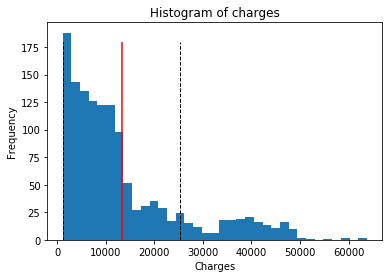

In [18]:
charges_mean = df.charges.mean()
charges_std = df.charges.std()
df.charges.plot.hist(bins = 35)
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Histogram of charges")

plt.vlines(charges_mean, 0, 180, color = "red")
plt.vlines([charges_mean - charges_std, charges_mean + charges_std]
           , 0, 180, linestyle = "--", linewidth = 1)

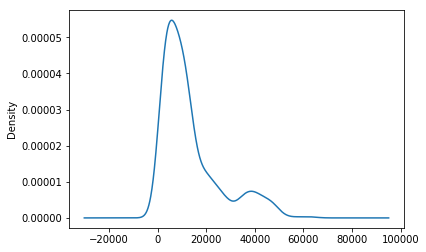

In [20]:
df.charges.plot.density()

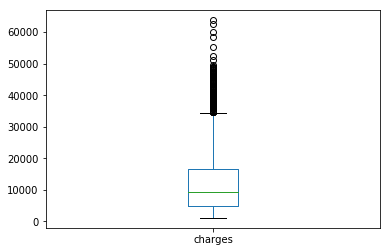

In [19]:
df.charges.plot.box()

In [21]:
import numpy as np

In [28]:
y = df.charges
def iqr(y):
    q1, q2, q3 = np.percentile(y, [25, 50, 75])
    iqr = q3 - q1
    return iqr


In [26]:
y = np.array([4, 6, 10, 3, 7])
np.mean(y), np.std(y)

(6.0, 2.449489742783178)

In [27]:
y = np.array([4, 6, 10, 3, 7, 100])
np.mean(y), np.std(y)

(21.666666666666668, 35.103022978402045)

In [29]:
y = np.array([4, 6, 10, 3, 7])
np.median(y), iqr(y)

(6.0, 3.0)

In [30]:
y = np.array([4, 6, 10, 3, 7, 100])
np.median(y), iqr(y)

(6.5, 4.75)

In [76]:
def outliers(y):
    q1, q2, q3 = np.percentile(y, [25, 50, 75])
    iqr = q3 - q1
    lower_whisker = max(q1 - 1.5 * iqr, np.min(y))
    upper_whisker = min(q3 + 1.5 * iqr, np.max(y))
    print("Outlier boundaries: ", lower_whisker, upper_whisker)
    return (y>upper_whisker) | (y<lower_whisker)

outliers(np.array([5, 7, 10, 23,2, 4, 8, 100]))


Outlier boundaries:  2 26.0


array([False, False, False, False, False, False, False,  True])

In [78]:
import scipy as sp

array([0., 0., 0., ..., 0., 0., 0.])

In [34]:
df[outliers(df.charges)]

Outlier boundaries:  1121.8739 34489.350562499996


,age,gender,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
34,28,male,36.400,1,yes,southwest,51194.55914
38,35,male,36.670,1,yes,northeast,39774.27630
39,60,male,39.900,0,yes,southwest,48173.36100
49,36,male,35.200,1,yes,southeast,38709.17600
53,36,male,34.430,0,yes,southeast,37742.57570


In [35]:
y_log = np.log(df.charges)

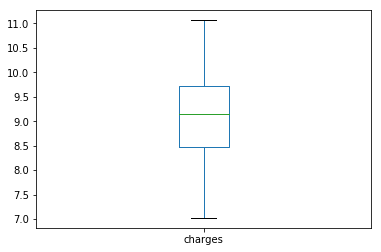

In [36]:
y_log.plot.box()

In [38]:
df[outliers(y_log)]

Outlier boundaries:  7.02275569117477 11.063044851063491


,age,gender,bmi,children,smoker,region,charges


In [39]:
df[outliers(df.charges)].shape

Outlier boundaries:  1121.8739 34489.350562499996


(139, 7)

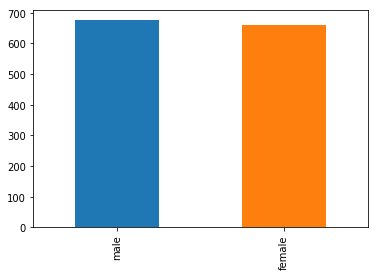

In [42]:
df.gender.value_counts().plot.bar()

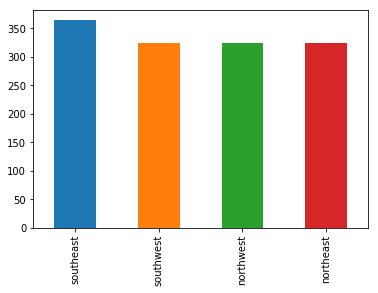

In [45]:
df.region.value_counts().sort_values(ascending = False).plot.bar()

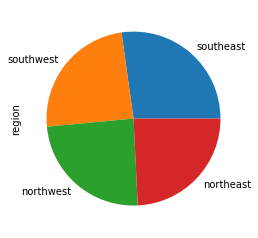

In [46]:
df.region.value_counts().sort_values(ascending = False).plot.pie()

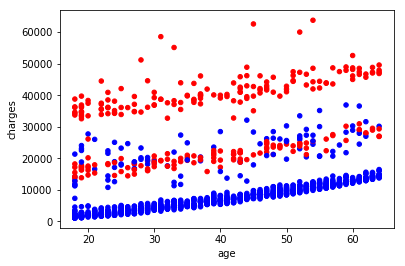

In [49]:
colors = np.where(df.smoker == "yes", "red", "blue")
df.plot.scatter("age", "charges", color = colors)

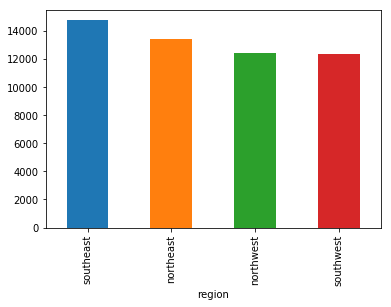

In [52]:
df.groupby("region").charges.mean().sort_values(ascending = False).plot.bar()

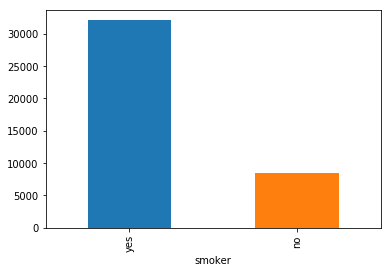

In [53]:
df.groupby("smoker").charges.mean().sort_values(ascending = False).plot.bar()

In [57]:
agg = df.pivot_table("charges", "gender", "region")
agg

region,northeast,northwest,southeast,southwest
gender,,,,
female,12953.203151,12479.870397,13499.669243,11274.411264
male,13854.005374,12354.119575,15879.617173,13412.883576


In [56]:
import seaborn as sns

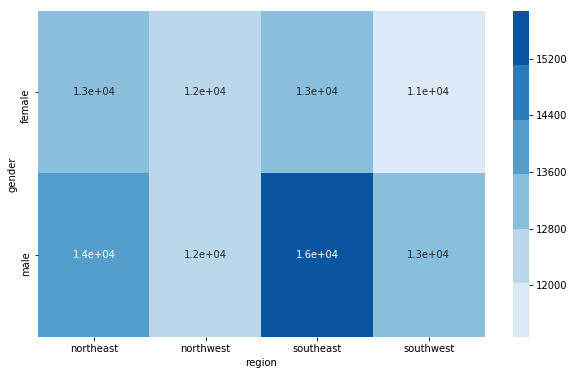

In [62]:
plt.figure(figsize = (10, 6))
sns.heatmap(agg, cmap=sns.color_palette("Blues"), annot=True)

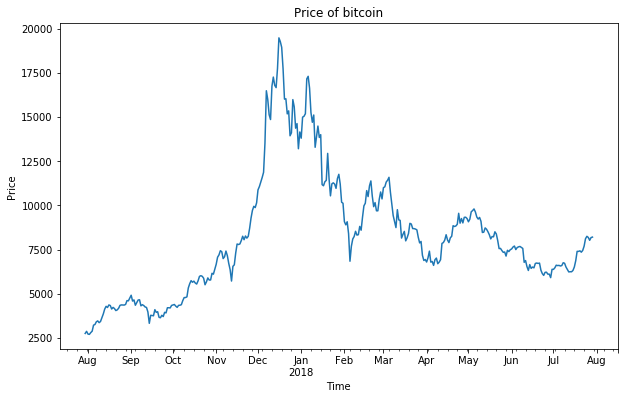

In [73]:
plt.figure(figsize = (10, 6))
bitcoin = pd.read_csv("/data/bitcoin.csv", header = None)
bitcoin.index = pd.to_datetime(bitcoin[0])
bitcoin = bitcoin.iloc[:, 1]
bitcoin.plot()
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Price of bitcoin")

plt.savefig("bitcoin.jpg")

plt.savefig("bitcoin.pdf")